<a href="https://colab.research.google.com/github/drigovieira/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
upload = files.upload()

Saving credit_card_fraud_dataset.csv to credit_card_fraud_dataset.csv


In [ ]:
df = pd.read_csv('credit_card_fraud_dataset.csv')

In [ ]:
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [ ]:
df

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...,...
99995,99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99996,99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99997,99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0
99998,99999,2024-10-18 09:43:36.027601,3750.79,644,purchase,Philadelphia,0


In [ ]:
df.dtypes

,0
TransactionID,int64
TransactionDate,object
Amount,float64
MerchantID,int64
TransactionType,object
Location,object
IsFraud,int64


In [ ]:
df = df.drop(columns=['TransactionID'])

In [ ]:
df.head()

,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [ ]:
df['TransactionDate'] = df['TransactionDate'].str.replace(':\d\d.\d\d\d\d\d\d','', regex=True)

In [ ]:
df.head()

,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,2024-04-03 14:15,4189.27,688,refund,San Antonio,0
1,2024-03-19 13:20,2659.71,109,refund,Dallas,0
2,2024-01-08 10:08,784.00,394,purchase,New York,0
3,2024-04-13 23:50,3514.40,944,purchase,Philadelphia,0
4,2024-07-12 18:51,369.07,475,purchase,Phoenix,0


In [ ]:
df.dtypes

,0
TransactionDate,object
Amount,float64
MerchantID,int64
TransactionType,object
Location,object
IsFraud,int64


In [ ]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [ ]:
df.dtypes

,0
TransactionDate,datetime64[ns]
Amount,float64
MerchantID,int64
TransactionType,object
Location,object
IsFraud,int64


In [ ]:
df.head()

,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,2024-04-03 14:15:00,4189.27,688,refund,San Antonio,0
1,2024-03-19 13:20:00,2659.71,109,refund,Dallas,0
2,2024-01-08 10:08:00,784.00,394,purchase,New York,0
3,2024-04-13 23:50:00,3514.40,944,purchase,Philadelphia,0
4,2024-07-12 18:51:00,369.07,475,purchase,Phoenix,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   TransactionDate  100000 non-null  datetime64[ns]
 1   Amount           100000 non-null  float64       
 2   MerchantID       100000 non-null  int64         
 3   TransactionType  100000 non-null  object        
 4   Location         100000 non-null  object        
 5   IsFraud          100000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [ ]:
df['Amount'].describe()

,Amount
count,100000.000000
mean,2497.092666
std,1442.415999
min,1.050000
25%,1247.955000
50%,2496.500000
75%,3743.592500
max,4999.770000


In [ ]:
df_transaction_type = round(df.groupby(['TransactionType'])['Amount'].agg('mean').reset_index(),2)

In [ ]:
df_location = round(df.groupby(['Location'])['Amount'].agg('mean').reset_index(),2)

In [ ]:
df_location_transaction_type = round(df.groupby(['Location','TransactionType'])['Amount'].agg('mean').reset_index(),2)

In [ ]:
import seaborn as sns

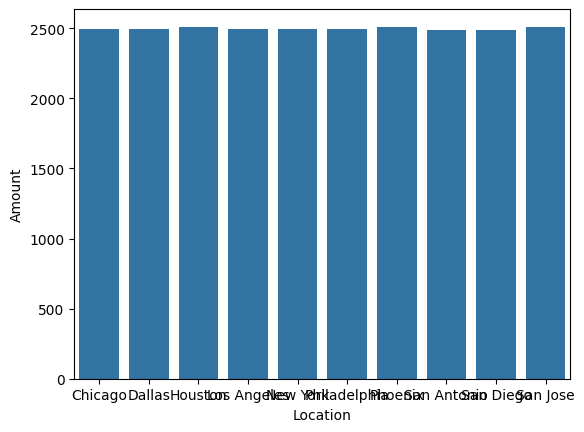

In [ ]:
ax = sns.barplot(x='Location', y='Amount', data=df_location)

<Axes: xlabel='Count', ylabel='Amount'>

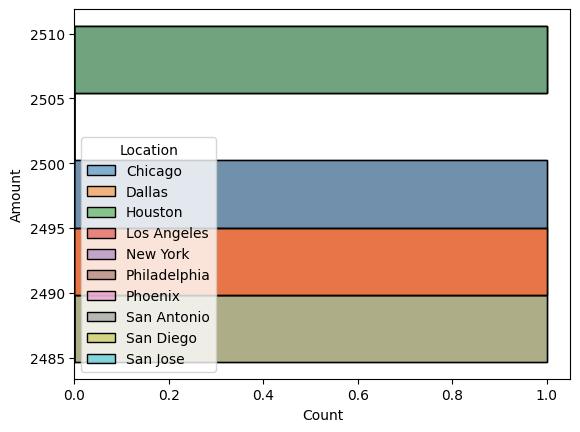

In [ ]:
sns.histplot(data = df_location, y='Amount', hue='Location')

In [ ]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.9 MB/s eta 0:00:00


In [ ]:
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [ ]:
df_transaction_type

,TransactionType,Amount
0,purchase,2500.45
1,refund,2493.75


In [ ]:
px.bar(df_transaction_type, x='TransactionType', y='Amount')

In [ ]:
df_location

,Location,Amount
0,Chicago,2497.52
1,Dallas,2492.67
2,Houston,2510.60
3,Los Angeles,2493.02
4,New York,2491.95
5,Philadelphia,2496.50
6,Phoenix,2509.40
7,San Antonio,2484.66
8,San Diego,2489.41
9,San Jose,2505.57


In [ ]:
px.line(df_location, x='Location', y='Amount')

In [ ]:
df_location_transaction_type

,Location,TransactionType,Amount
0,Chicago,purchase,2487.31
1,Chicago,refund,2507.46
2,Dallas,purchase,2506.96
3,Dallas,refund,2478.23
4,Houston,purchase,2516.87
5,Houston,refund,2504.33
6,Los Angeles,purchase,2507.13
7,Los Angeles,refund,2479.41
8,New York,purchase,2498.12
9,New York,refund,2485.81


In [ ]:
px.bar(df_location_transaction_type, x='Location', y='Amount', color='TransactionType')

In [ ]:
df_fraud = df[df['IsFraud']==1]

In [ ]:
df_fraud

,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
190,2024-09-07 18:24:00,1703.80,916,purchase,San Jose,1
191,2024-04-27 01:48:00,4248.10,862,purchase,San Jose,1
208,2023-11-05 01:05:00,1641.32,826,purchase,San Jose,1
319,2024-06-16 18:30:00,281.18,237,purchase,Philadelphia,1
370,2023-10-29 04:09:00,3047.66,789,purchase,New York,1
...,...,...,...,...,...,...
99392,2024-06-05 00:58:00,3358.10,286,purchase,Chicago,1
99607,2023-10-27 08:34:00,564.19,454,purchase,Phoenix,1
99614,2023-11-21 04:18:00,4083.63,514,purchase,Philadelphia,1
99725,2024-08-30 04:40:00,3825.68,15,refund,Los Angeles,1


In [ ]:
df_fraud = df_fraud.groupby('Location').agg(
    Fraud_Count=('IsFraud', 'count'),
    Total_Amount_Fraud=('Amount', 'sum')
).sort_values(by='Fraud_Count', ascending=False).reset_index()

In [ ]:
df_fraud

,Location,Fraud_Count,Total_Amount_Fraud
0,New York,116,314198.81
1,San Diego,115,283773.43
2,Houston,105,276888.29
3,Dallas,99,241816.01
4,Phoenix,99,271033.39
5,San Antonio,99,229781.26
6,Chicago,95,221030.14
7,Los Angeles,95,230182.77
8,Philadelphia,90,224239.51
9,San Jose,87,224220.83
